In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [4]:
df_unique_bbox = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_unique_train.df')

In [8]:
for i in range(100000,550000,50000):
    print(i)

100000
150000
200000
250000
300000
350000
400000
450000
500000


## sampling for staring budget

In [13]:
cycles = []
for i in range(100000,550000,50000):
    indices = list(range(len(df_unique_bbox)))
# random.seed(1234)
    random.shuffle(indices)
    labeled_set = indices[:i]
    cycles.append(labeled_set)

# unlabeled_set = set(indices) - set(labeled_set) #[x for x in indices if x not in labeled_set]
# unlabeled_set = list(unlabeled_set)



In [6]:
df_unique_bbox

,img_name,bbox_pixel_level,category_id,resized_name
0,S1/L07/L07_R1/S1_L07_R1_PICT0103,"[178.91328, 0.0, 1585.9712, 1440.9216000000001]",11,S1/L07/L07_R1/S1_L07_R1_PICT0103_0
1,S1/L07/L07_R1/S1_L07_R1_PICT0234,"[1268.1216, 0.0, 771.8912, 1408.8192]",11,S1/L07/L07_R1/S1_L07_R1_PICT0234_1
2,S1/L07/L07_R1/S1_L07_R1_PICT0072,"[33.32096, 0.0, 2014.6176, 1446.2975999999999]",9,S1/L07/L07_R1/S1_L07_R1_PICT0072_2
3,S1/L07/L07_R1/S1_L07_R1_PICT0020,"[0.3639296, 1133.4144000000001, 131.21536, 300...",16,S1/L07/L07_R1/S1_L07_R1_PICT0020_3
4,S1/L07/L07_R1/S1_L07_R1_PICT0122,"[719.872, 14.737919999999999, 1327.9232, 1253....",11,S1/L07/L07_R1/S1_L07_R1_PICT0122_4
...,...,...,...,...
512517,S5/K02/K02_R3/S5_K02_R3_IMAG0087,"[1830.912, 69.2736, 216.8832, 1012.0704000000001]",11,S5/K02/K02_R3/S5_K02_R3_IMAG0087_1461185
512518,S5/K02/K02_R3/S5_K02_R3_IMAG0279,"[11.917312, 89.3184, 648.3968, 1373.184]",3,S5/K02/K02_R3/S5_K02_R3_IMAG0279_1461186
512519,S5/K02/K02_R3/S5_K02_R3_IMAG0301,"[0.0, 390.60480000000007, 1208.5248, 804.55680...",13,S5/K02/K02_R3/S5_K02_R3_IMAG0301_1461187
512520,S5/K02/K02_R3/S5_K02_R3_IMAG0146,"[2.7648, 277.8624, 535.1424, 1157.0688]",16,S5/K02/K02_R3/S5_K02_R3_IMAG0146_1461188


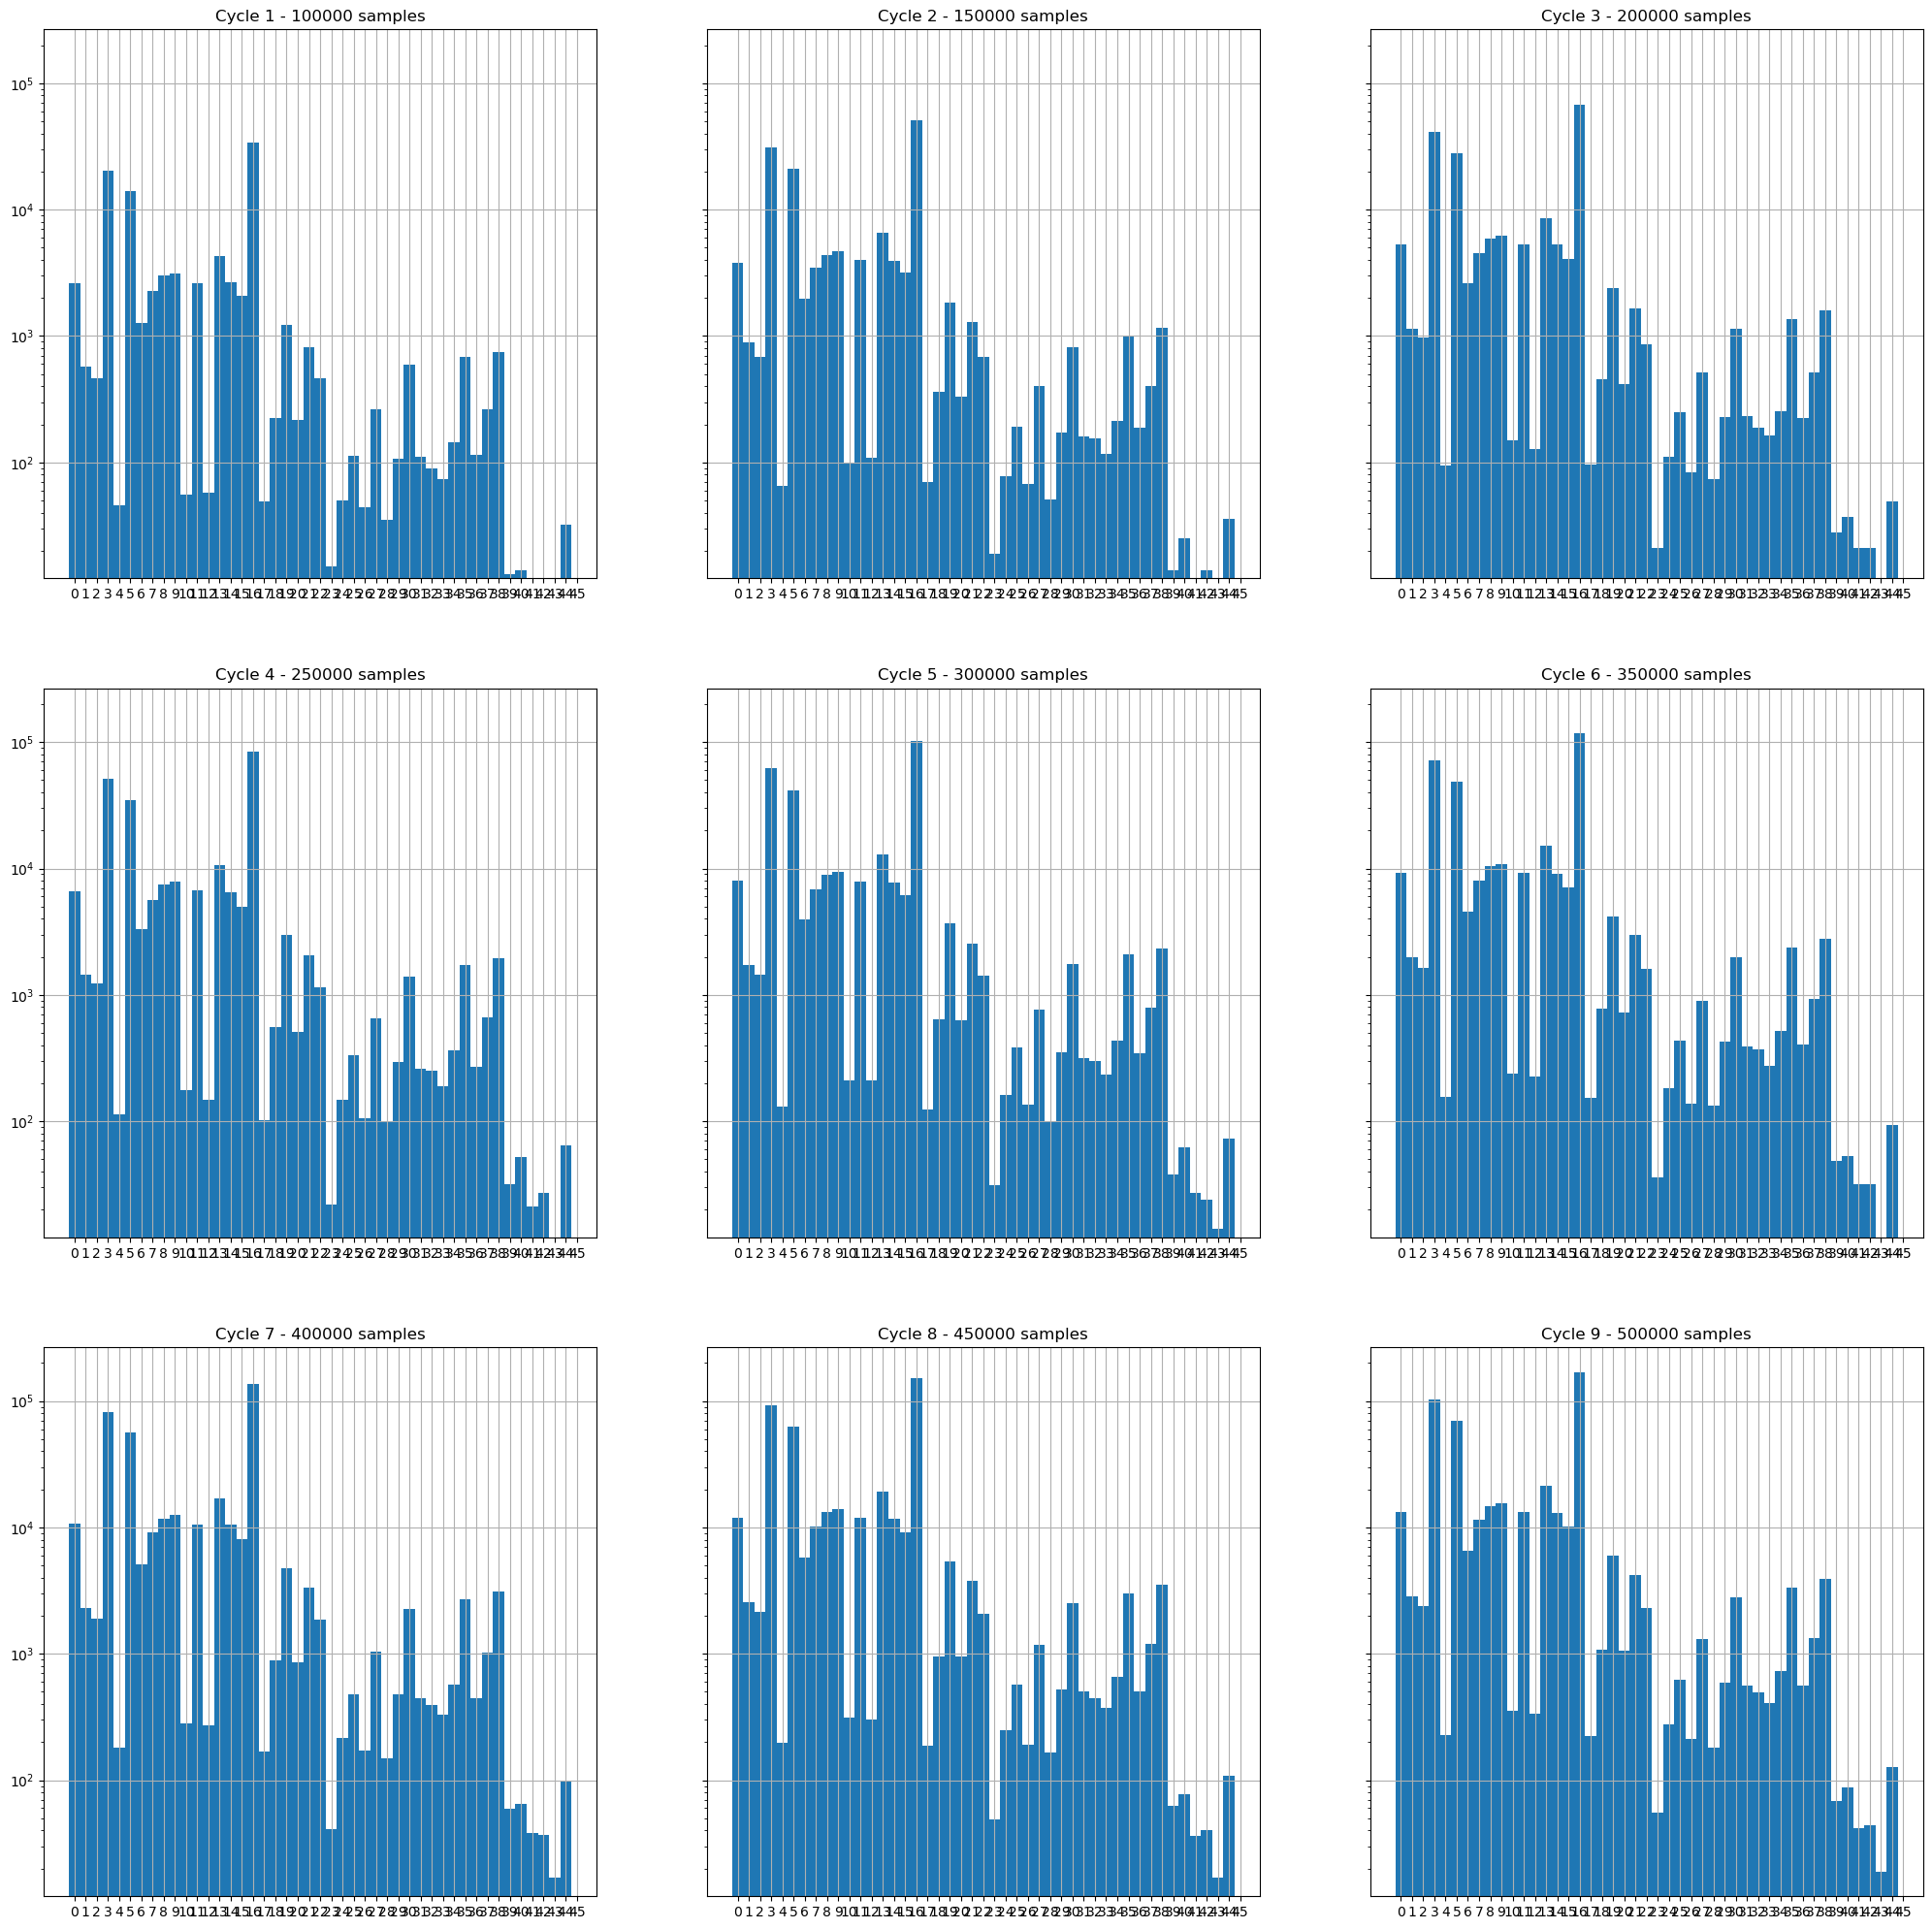

In [14]:
fig, axes = plt.subplots(3,3,figsize=(25,25),sharey=True)

for i, ax in enumerate(axes.flatten()):
    class_occurences = df_unique_bbox.iloc[cycles[i]].category_id.tolist()

    ax.hist(class_occurences,bins=np.arange(0,len(df_unique_bbox.category_id.unique()+1),1),log=True,align='left')
    ax.set_xticks(np.arange(0,46,1))
    ax.grid()
    ax.set_title(f'Cycle {i+1} - {len(cycles[i])} samples')


In [12]:
cycles

[]

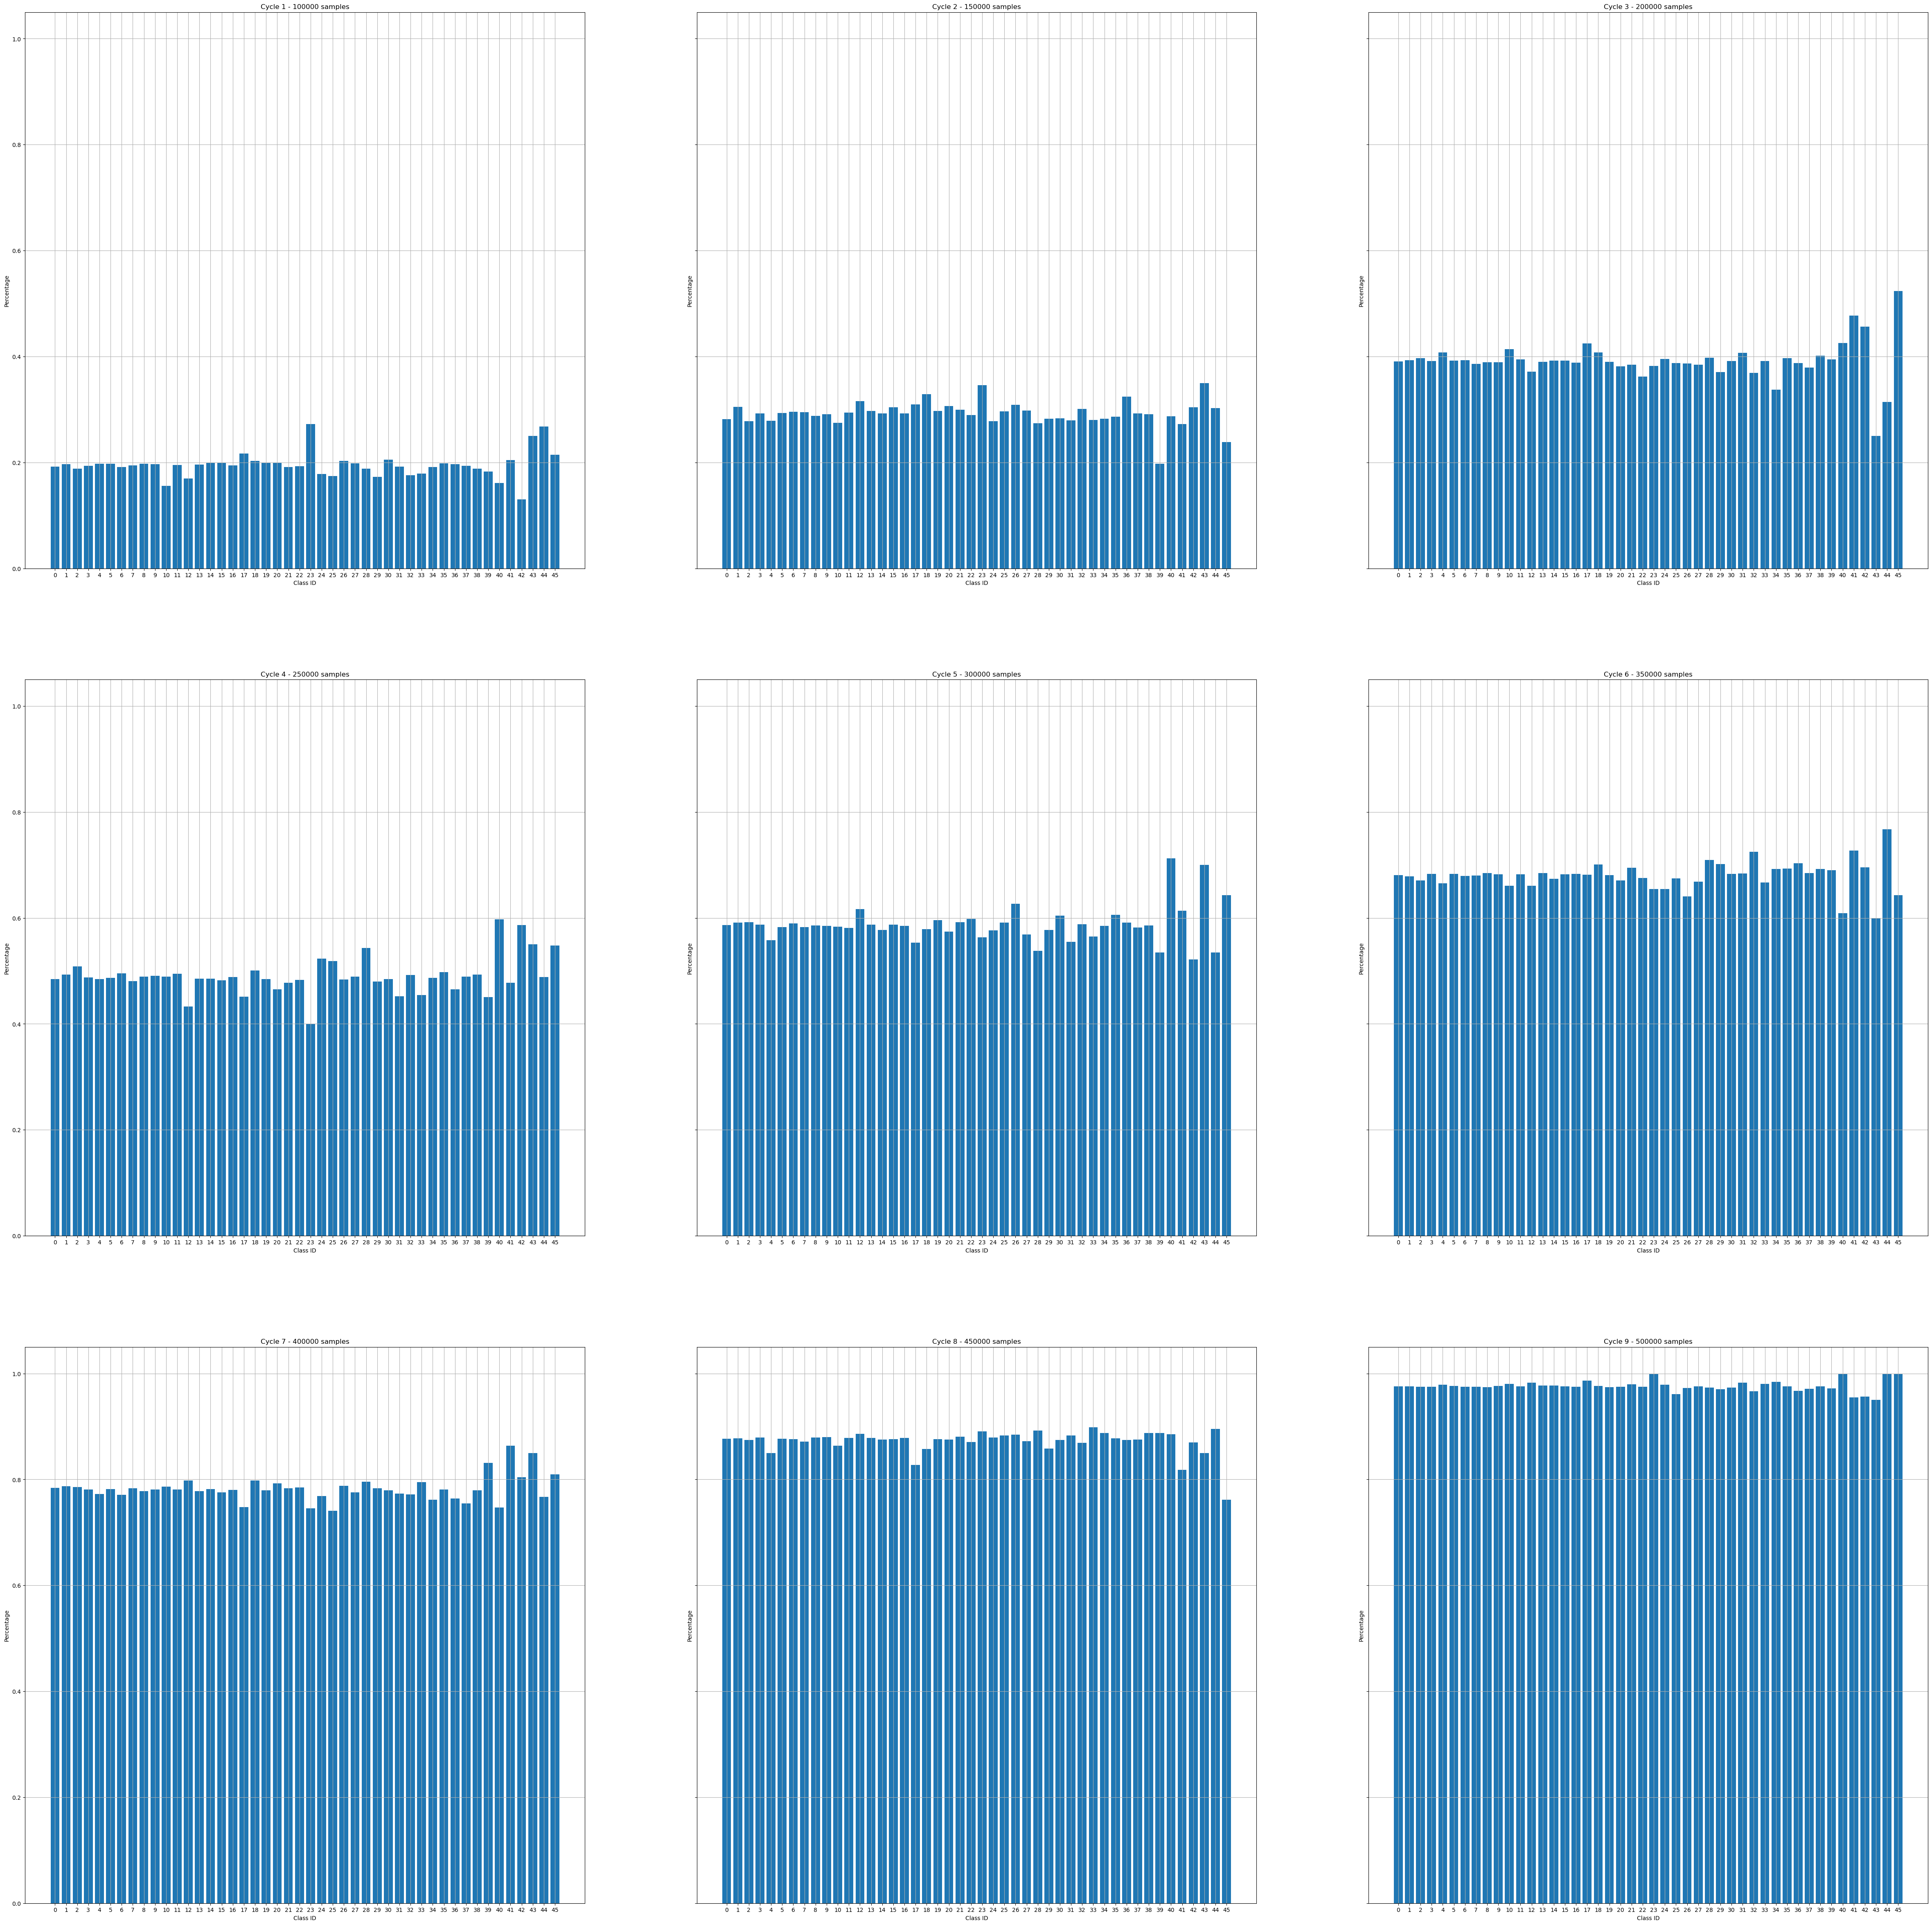

In [15]:
total_occurence = {}
for i in range(46):
    total_occurence[i] = df_unique_bbox.category_id.tolist().count(i)

fig, axes = plt.subplots(3,3,figsize=(60,60),sharey=True)
for i, ax in enumerate(axes.flatten()):
    curr_occurence = df_unique_bbox.iloc[cycles[i]].category_id.tolist()

    count = {}
    for j in range(46):
        count[j] = curr_occurence.count(j)
    
    percentage = [list(count.values())[j]/total_occurence[j] for j in range(46)]
    ax.bar(count.keys(),percentage,log=False)
    ax.grid()
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Class ID')
    ax.set_xticks(np.arange(0,46,1))
    ax.set_title(f'Cycle {i+1} - {len(cycles[i])} samples')
    

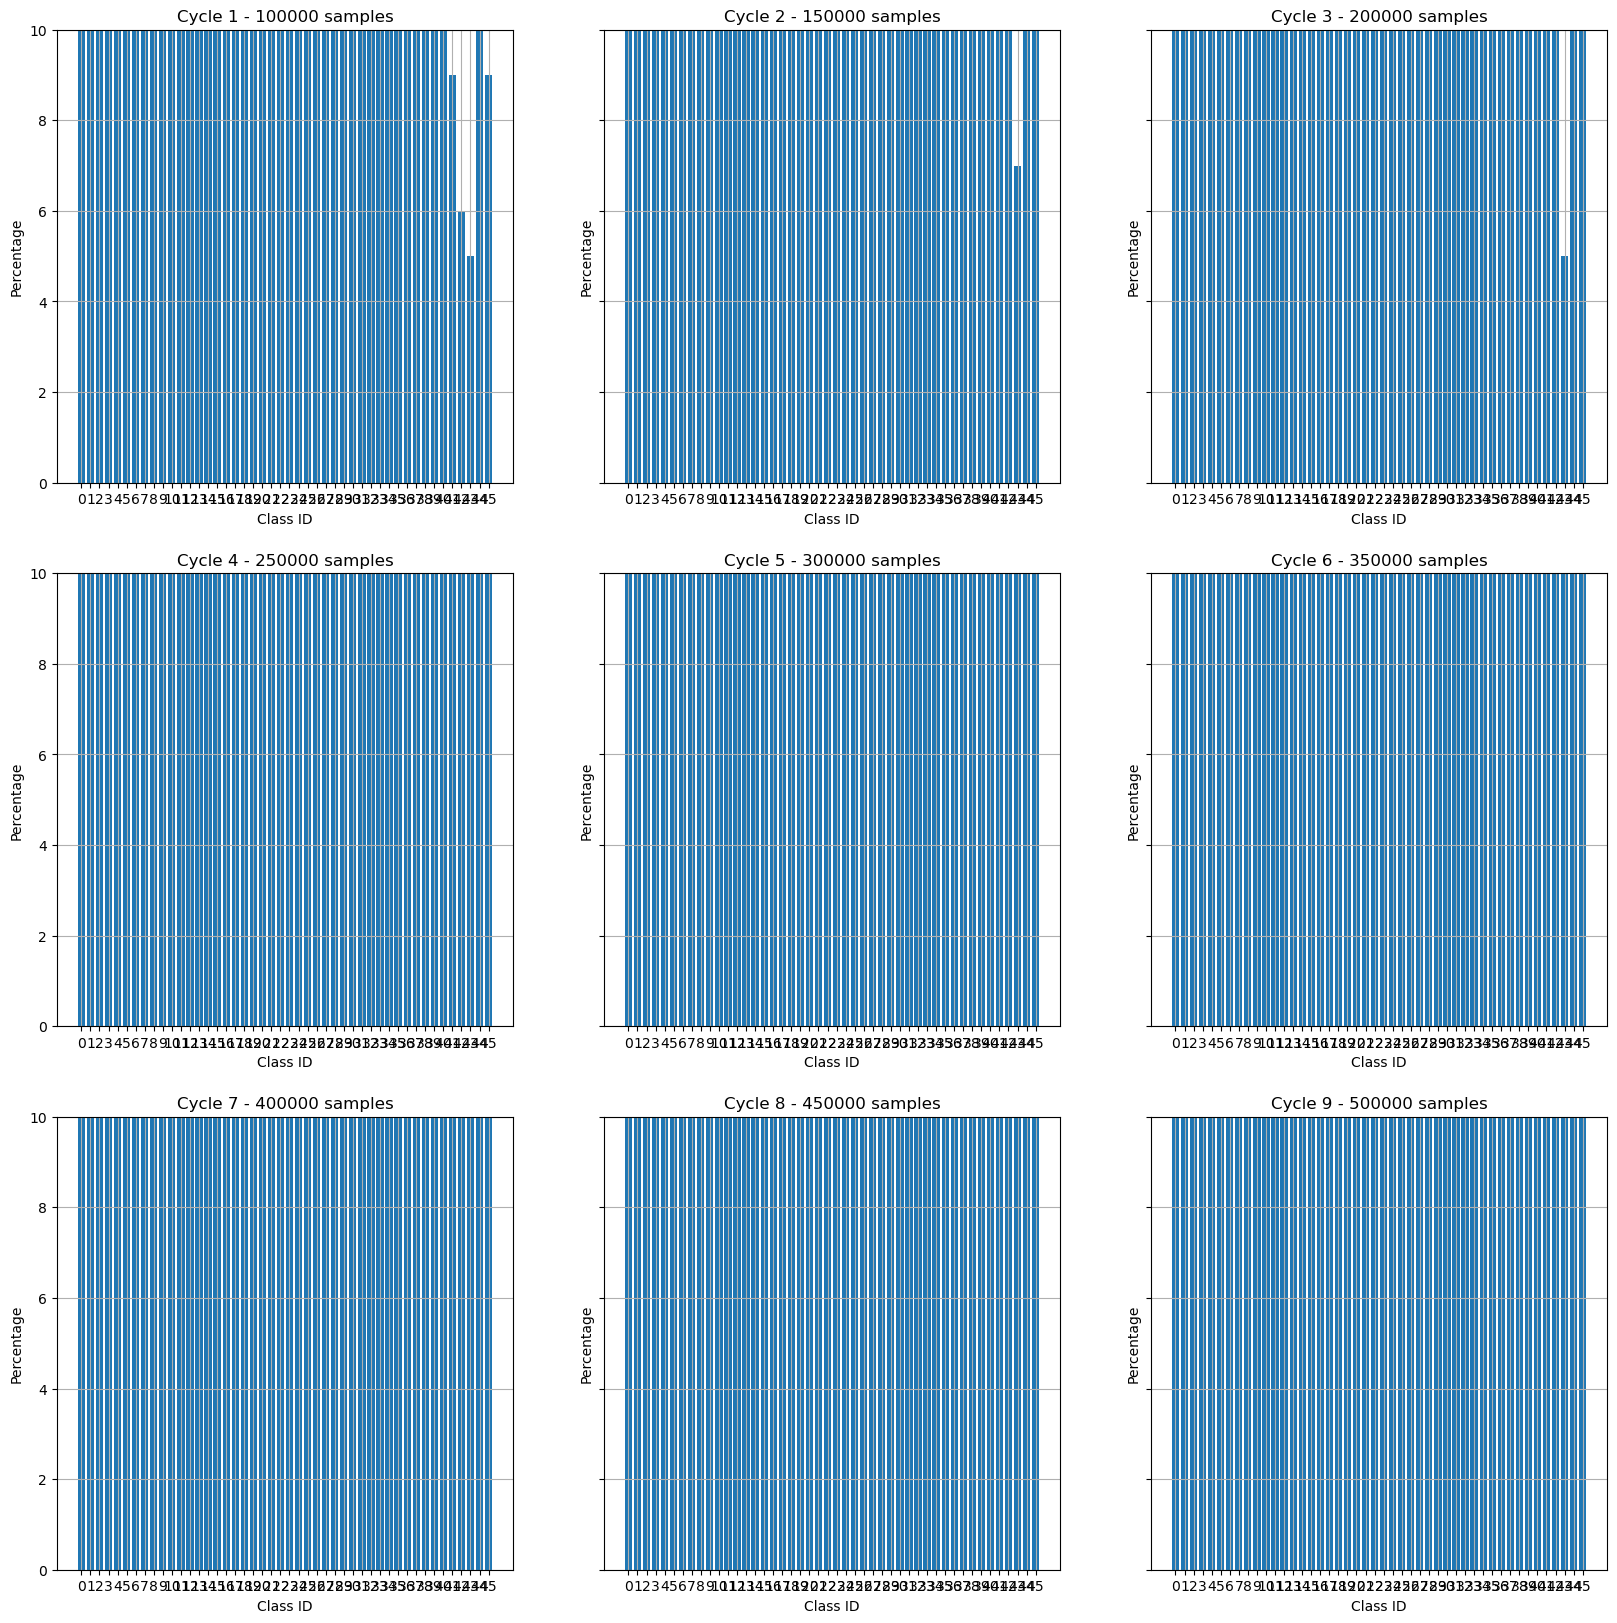

In [16]:
total_occurence = {}
for i in range(46):
    total_occurence[i] = df_unique_bbox.category_id.tolist().count(i)

fig, axes = plt.subplots(3,3,figsize=(20,20),sharey=True)
for i, ax in enumerate(axes.flatten()):
    curr_occurence = df_unique_bbox.iloc[cycles[i]].category_id.tolist()

    count = {}
    for j in range(46):
        count[j] = curr_occurence.count(j)
    
    ax.bar(count.keys(),count.values(),log=False)
    ax.grid()
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Class ID')
    ax.set_xticks(np.arange(0,46,1))
    ax.set_ylim(0,10)
    ax.set_title(f'Cycle {i+1} - {len(cycles[i])} samples')

In [81]:
for i in range(9):
    occurence = df_unique_bbox.iloc[cycles[i]].category_id.tolist()
    occurence = [occurence.count(j) for j in range(46)]
    print(occurence[43])



5
4
7
11
16
14
16
18
19


In [24]:
histogram_occurence = {}
for i in set(class_occurences):
    histogram_occurence[i] = class_occurences.count(i)

histogram_occurence

{0: 13223,
 1: 2847,
 2: 2375,
 3: 102651,
 4: 226,
 5: 69809,
 6: 6496,
 7: 11439,
 8: 14793,
 9: 15612,
 10: 352,
 11: 13174,
 12: 332,
 13: 21430,
 14: 13074,
 15: 10142,
 16: 169382,
 17: 220,
 18: 1084,
 19: 5989,
 20: 1065,
 21: 4171,
 22: 2331,
 23: 55,
 24: 274,
 25: 635,
 26: 216,
 27: 1309,
 28: 181,
 29: 595,
 30: 2825,
 31: 558,
 32: 496,
 33: 404,
 34: 727,
 35: 3342,
 36: 562,
 37: 1341,
 38: 3880,
 39: 68,
 40: 84,
 41: 43,
 42: 44,
 43: 19,
 44: 84,
 45: 41}

## Sampling for training time reduction (subset)

In [18]:
# Interleave labelled and unlabelled batches.
NUM_TRAIN = 512522
indices = list(range(NUM_TRAIN))
random.seed(1234)
random.shuffle(indices)

labeled_set = indices[:5000]
unlabeled_set = list(set(indices) - set(labeled_set)) #[x for x in indices if x not in labeled_set]
random.shuffle(unlabeled_set)
BATCH= 128
SUBSET = 200000#512522
if SUBSET < len(labeled_set):
    SUBSET = len(labeled_set)
k = int(SUBSET/BATCH)
SUBSET = k * BATCH
subset = unlabeled_set[:SUBSET]
assert NUM_TRAIN == len(labeled_set) + len(unlabeled_set)



In [85]:
index45 = list(df_unique_bbox[df_unique_bbox.category_id == 43].index)


c = 0
for i in index45:
    if i in unlabeled_set:
        c+=1

print(c)
print(len(index45))

20
20


In [86]:
for c in cycles:
    n =0
    for i in index45:
        if i in c:
            n+=1
    print(n)

3
7
9
10
11
13
15
18
20
20
20


In [80]:
max(df_unique_bbox.category_id.unique())

45

In [82]:
np.histogram(class_occurences,bins=np.arange(0,len(df_unique_bbox.category_id.unique())+1,1))

(array([ 13257,   2840,   2385, 102609,    227,  69756,   6491,  11465,
         14791,  15601,    349,  13134,    335,  21471,  13100,  10145,
        169383,    225,   1068,   5987,   1065,   4178,   2324,     55,
           272,    632,    212,   1301,    181,    603,   2821,    560,
           505,    403,    733,   3352,    567,   1331,   3897,     71,
            85,     43,     45,     20,     84,     41]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]))

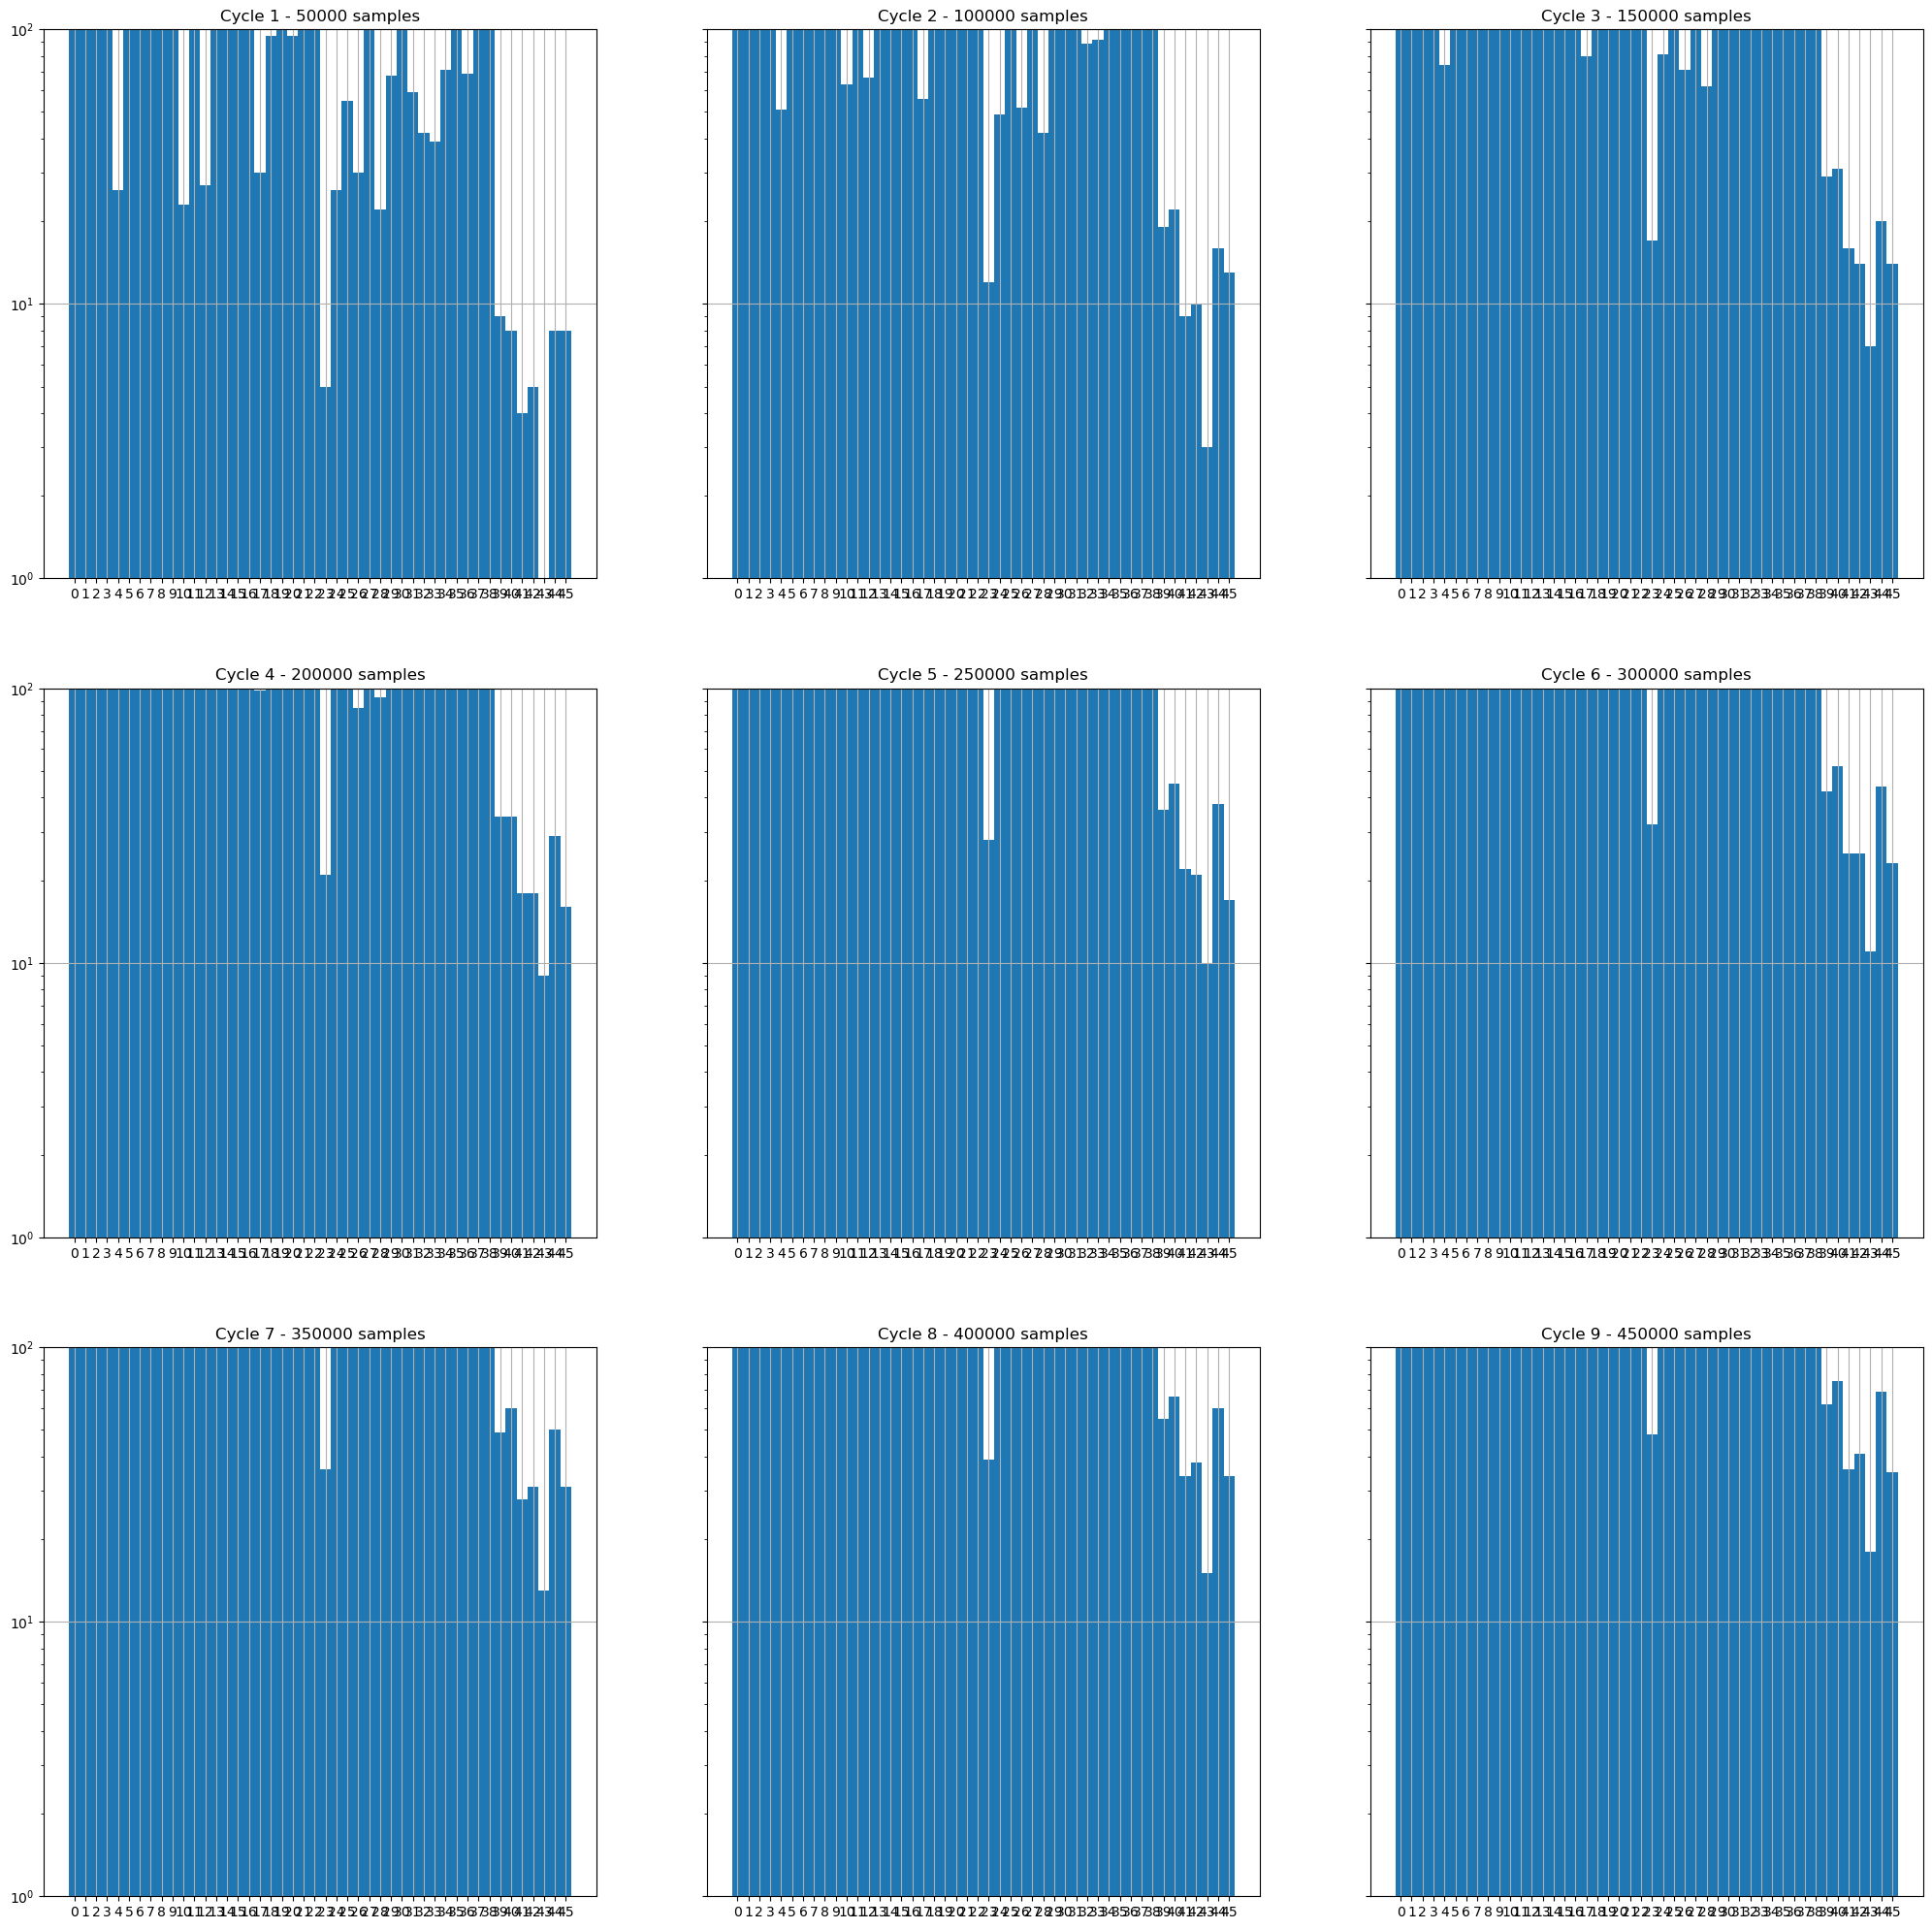

In [19]:
cycles = []
for i in range(50000,650000,50000):
    cycles.append(unlabeled_set[:i])

fig, axes = plt.subplots(3,3,figsize=(25,25),sharey=True)

for i, ax in enumerate(axes.flatten()):
    class_occurences = df_unique_bbox.iloc[cycles[i]].category_id.tolist()

    ax.hist(class_occurences,bins=np.arange(0,len(df_unique_bbox.category_id.unique())+1,1),log=True,align='left')
    ax.set_xticks(np.arange(0,46,1))
    ax.grid()
    ax.set_ylim(1,100)
    ax.set_title(f'Cycle {i+1} - {len(cycles[i])} samples')

    

## probability of each class in the dataset

In [24]:
NUM_TRAIN = 512522
indices = list(range(NUM_TRAIN))
rnd = random.Random(1234)
rnd.seed(1234)
rnd.shuffle(indices)

labeled_set = indices[:5000]
unlabeled_set = list(set(indices) - set(labeled_set))

In [49]:

count =[0]*46
simulations = 10000
for sim in range(simulations):
    rnd_free = random.Random()
    rnd_free.shuffle(unlabeled_set)
    subset = unlabeled_set[:250000]
    class_occurences = df_unique_bbox.iloc[subset].category_id.tolist()
    class_occurence_hist = np.histogram(class_occurences,bins=np.arange(0,len(df_unique_bbox.category_id.unique())+1,1))

    for i in range(len(class_occurence_hist[0])): 
        if class_occurence_hist[0][i] > 0:
            count[i] +=1
count

In [51]:

simulations = 10000
nums = [50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000]
all_counts = []
for n in nums:
    count =[0]*46
    for sim in range(simulations):
        rnd_free = random.Random()
        rnd_free.shuffle(unlabeled_set)
        subset = unlabeled_set[:n]
        class_occurences = df_unique_bbox.iloc[subset].category_id.tolist()
        class_occurence_hist = np.histogram(class_occurences,bins=np.arange(0,len(df_unique_bbox.category_id.unique())+1,1))

        for i in range(len(class_occurence_hist[0])): 
            if class_occurence_hist[0][i] > 0:
                count[i] +=1
    
    all_counts.append(count)
all_counts

[[10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  9964,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  9996,
  9997,
  9879,
  9918,
  8755,
  9999,
  9876],
 [10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  9997,
  10000,
  9881,
  10000,
  9998],
 [10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
 

In [53]:
len(all_counts)

11